In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
import json, os, pickle
from collections import defaultdict
import nupack
import sklearn
from scipy import stats


from tqdm import tqdm
import itertools

from nnn import util, fileio, mupack, plotting, modeling
import nnn.motif_fit as mf
import wandb

# suppress warnings 
import warnings
warnings.filterwarnings("ignore")

from nnn import train_nn as tnn

In [144]:
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = 1.,
    fit_method = 'svd',
    feature_method = 'get_nupack_feature_list',
    fit_intercept=False, 
    symmetry=False,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'val', # {'val', 'test'}
    use_model_from = 'json', # {'lr_dict', 'json'}
    )

In [ ]:
wandb.login(key='81481cd721612506032d1d79f49e08c699dca4e5')

In [4]:
with wandb.init(project="NN", config=config):
    # access all HPs through wandb.config, so logging matches execution!
    wandb_config = wandb.config

In [8]:
fileio.write_json(dict(wandb_config), './models/test.json')

In [2]:
fixed_pclass = []#['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = .1,
    fit_method = 'svd',
    feature_method = 'get_feature_list',
    fit_intercept=False, 
    symmetry=False,
    sep_base_stack=True,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'val', # {'val', 'test'}
    use_model_from = 'lr_dict', # {'lr_dict', 'json'}
    )

feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


{'dH': LinearRegressionSVD(param='dH'), 'dG': LinearRegressionSVD()}

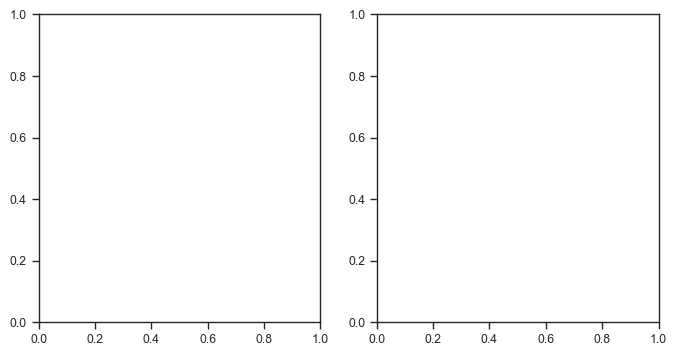

In [9]:
tnn.model_pipeline(config)

In [12]:
import numpy as np

feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 1338) Index(['A+A+T+T_(+(+)+)', 'A+C+G+T_(+(+)+)', 'A+G+C+T_(+(+)+)'], dtype='object')
fixed_feature_names: []
Empty DataFrame
Columns: [dH]
Index: []
[]
Empty DataFrame
Columns: [dG]
Index: []
[]


n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


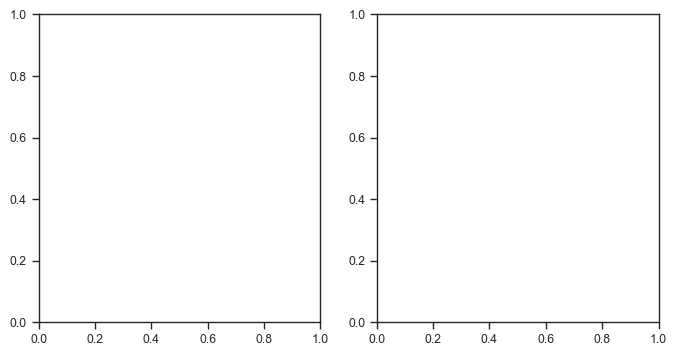

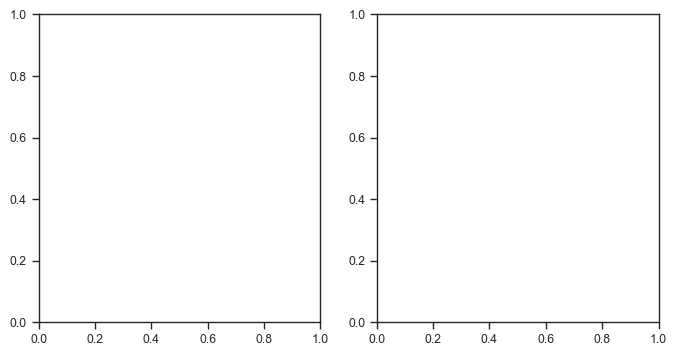

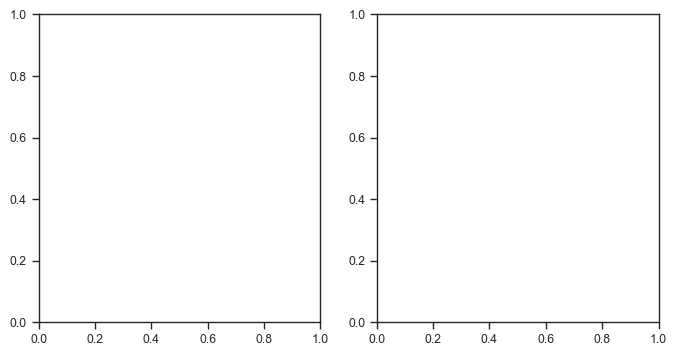

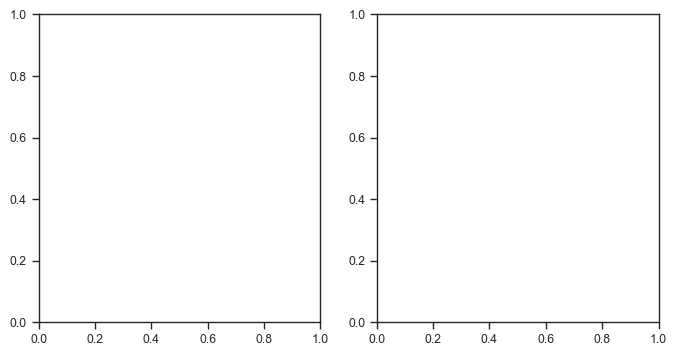

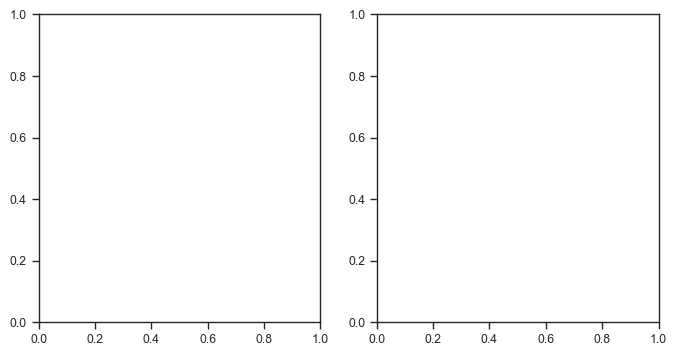

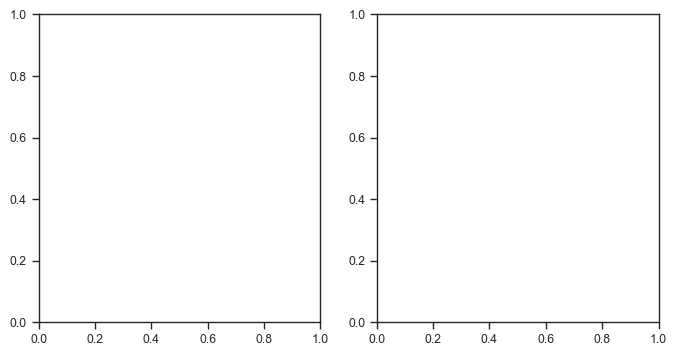

In [15]:
for ratio in np.arange(0.1, 1.2, .2):
    config.update(dict(use_train_set_ratio=ratio))
    tnn.model_pipeline(config)

## Tests

In [70]:
mydata = tnn.MyData(config)
mydata.load_everything()

In [71]:
mydata.prepare_val_df()['lit_uv'].RefSeq[0][0]

'GATATAGCAAAATTCTAAGTTAATA'

In [49]:
# FUNCTION TEST
metric_dict = dict(
    all=dict(
        Tm=dict(rmse=.3),
    ),
    arr=dict(
        Tm=dict(rmse=.2),
        dH=dict(mae=.1),
        dG=dict(corr=.4)
    ),
    ov=dict(
        Tm=dict(rmse=.5)
    )
)
tnn.flatten_metric_dict(metric_dict)

{'val_Tm_rmse-all': 0.3,
 'val_Tm_rmse-arr': 0.2,
 'val_dH_mae-arr': 0.1,
 'val_dG_corr-arr': 0.4,
 'val_Tm_rmse-ov': 0.5}

In [148]:
json_file = './models/dna04.json'
tnn.test(config, json_file=json_file, debug=True,
         save_val_result_df=True, save_metric_json=True)

Must call `wandb.init()` first


{'all': {'Tm': defaultdict(None,
              {'bias': 2.9661754466208308,
               'corr': 0.793026549915973,
               'rmse': 7.1620228136935244,
               'adjusted_rmse': 6.518924298051803,
               'mae': 5.892052892391525,
               'adjusted_mae': 5.187633316054081})},
 'arr': {'Tm': defaultdict(None,
              {'bias': 2.1660371069307516,
               'corr': 0.8959452233637897,
               'rmse': 8.990712948240732,
               'adjusted_rmse': 8.725892651704045,
               'mae': 8.017791998472129,
               'adjusted_mae': 7.956103122148103}),
  'dH': defaultdict(None,
              {'bias': -18.24327473438205,
               'corr': 0.9221060003295893,
               'rmse': 18.60773231164046,
               'adjusted_rmse': 3.664782223751652,
               'mae': 18.243274734382048,
               'adjusted_mae': 2.9590951856279553}),
  'dG': defaultdict(None,
              {'bias': -0.7781412594804302,
               'cor

In [127]:
val_kwargs = dict(
    sodium = 'varied',
    model_kwargs={'DNA_conc': val_df['DNA_conc'].values}
)
seq_list, struct_list, sodium, model_kwargs = modeling.get_model_prediction(
                val_df,
                model='nupack', 
                model_param_file=json_file,
                **val_kwargs
            )

In [126]:
modeling.run_nupack(seq_list, struct_list, sodium, json_file, model_kwargs)

,dH,Tm,dG_37
0,NaN,56.388872,NaN
1,NaN,60.447325,NaN
2,NaN,57.092821,NaN
3,NaN,56.638673,NaN
4,NaN,58.732291,NaN


# Results

In [16]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("keyuxi/NN")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [17]:
runs_df

,summary,config,name
0,"{'val_Tm_rmse-arr': 9.283199680525913, 'val_Tm...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",enchanted-vampire-40
1,"{'_step': 2, 'val_Tm_adjusted_mae-ov': 2.87318...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",moonlit-mausoleum-39
2,"{'val_Tm_rmse-all': 175.72643555321517, 'val_d...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",moonlit-orb-38
3,"{'val_dH_bias-arr': 1.689333693534664, '_step'...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",enchanted-whisper-37
4,"{'n_feat': 1338, 'train_dH_mae': 4.49127799892...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",dire-mask-36
5,"{'train_dG_mae': 0.30678331977679035, 'val_Tm_...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",frightful-goosebump-35
6,"{'train_dH_mae': 3.687438647893112, 'train_dH_...","{'symmetry': False, 'test_mode': 'val', 'fit_m...",unearthly-possession-34


In [20]:
wandb_df = pd.read_csv('./data/wandb/wandb_export_2023-10-30T15_45_45.142-07_00.csv')

In [29]:
wandb_df.columns

Index(['Name', 'Created', 'Runtime', 'Notes', 'use_train_set_ratio',
       'train_dG_mae', 'train_dG_rsqr', 'train_dH_mae', 'train_dH_rsqr',
       'val_Tm_adjusted_mae-all', 'val_Tm_adjusted_mae-arr',
       'val_Tm_adjusted_mae-lit_uv', 'val_Tm_adjusted_mae-ov',
       'val_Tm_adjusted_rmse-all', 'val_Tm_adjusted_rmse-arr',
       'val_Tm_adjusted_rmse-lit_uv', 'val_Tm_adjusted_rmse-ov',
       'val_Tm_bias-all', 'val_Tm_bias-arr', 'val_Tm_bias-lit_uv',
       'val_Tm_bias-ov', 'val_Tm_corr-all', 'val_Tm_corr-arr',
       'val_Tm_corr-lit_uv', 'val_Tm_corr-ov', 'val_Tm_mae-all',
       'val_Tm_mae-arr', 'val_Tm_mae-lit_uv', 'val_Tm_mae-ov',
       'val_Tm_rmse-all', 'val_Tm_rmse-arr', 'val_Tm_rmse-lit_uv',
       'val_Tm_rmse-ov', 'val_dG_adjusted_mae-arr', 'val_dG_adjusted_rmse-arr',
       'val_dG_bias-arr', 'val_dG_corr-arr', 'val_dG_mae-arr',
       'val_dG_rmse-arr', 'val_dH_adjusted_mae-arr',
       'val_dH_adjusted_rmse-arr', 'val_dH_bias-arr', 'val_dH_corr-arr',
       'val_

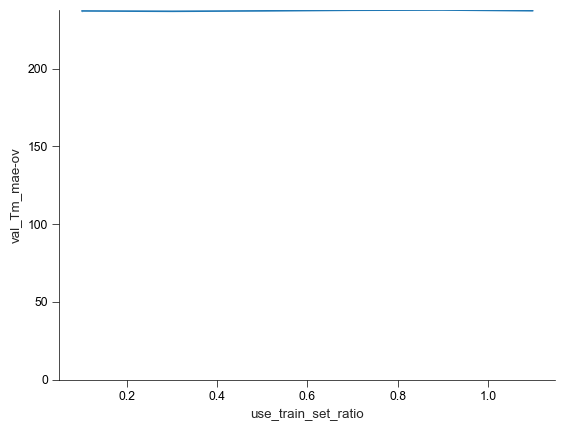

In [53]:
fig, ax = plt.subplots()
sns.lineplot(data=wandb_df, x='use_train_set_ratio', y='val_Tm_mae-ov',
            ax=ax)
# ax.set_ylim(bottom=0, top=1)
ax.set_ylim(bottom=0)
plotting.beutify(ax)